### Neuron analysis by Carl Lindersson
##### I have commented on most of the code to clearly show how I reasoned

In [271]:
import numpy as np # read/write/work with multidimentional data arrays 
from matplotlib import pyplot as plt # Library for plotting data

0.9

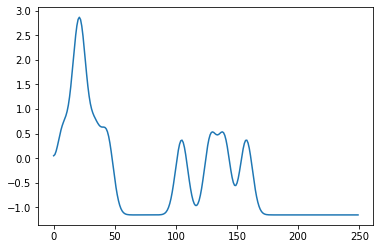

In [272]:
#_____LOAD DATA______

x_data = np.load("x.npy") # [neurons x trials] matrix of the value of the attended cue
                          # Cue is one of 5 different values (0.1, 0.3, 0.5, 0.7, 0.9), sampled with a uniform distribution

y_data = np.load("y.npy") # [neurons x trials x time] matrix of neural activity during each trial.
                          # D1 = Neurons (10)
                          # D2 = Trails  (342)
                          # D3 = Time    (250) 10 ms intervals from 0 to 2500 ms
                           
#____GETTING TO KNOW THE DATA____
                
np.shape(y_data) # (10, 342, 250) 
np.shape(x_data) # (10, 342)

import sys
np.set_printoptions(threshold=sys.maxsize) # to view array in full

x_data[0] #The First Neuron's cue value for each trial (n=342) 

y_data[0][0] #The First Neuron's firing-rate, on Trial 1, over 250 time points 

plt.plot(y_data[0][0]) #plot first neurons firing rate over time during first trail 
x_data[0][0] # returns cue for the first trail (0.9)

# Task 1
#### For each neuron (i.e. with a for loop)
#### 1. Plot the average firing rate across time for each of the 5 cues (like above)
#### 2. On the same plot, plot the standard error for each cue (don't worry about the fancy shading, or making pretty plots!)

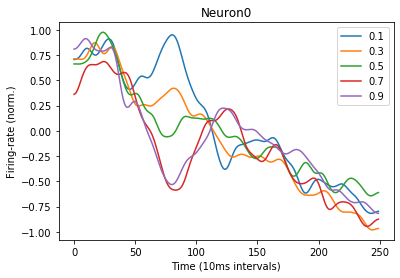

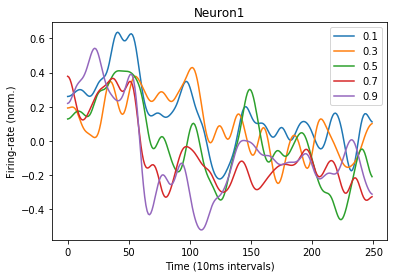

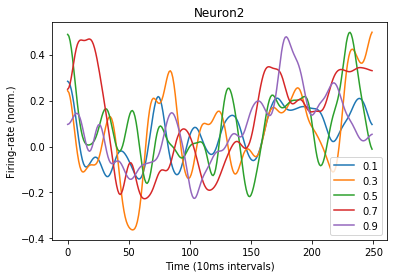

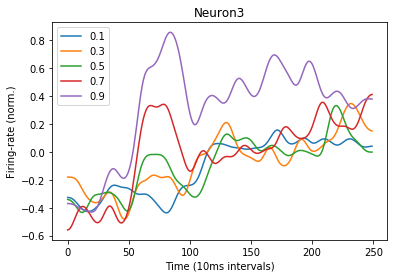

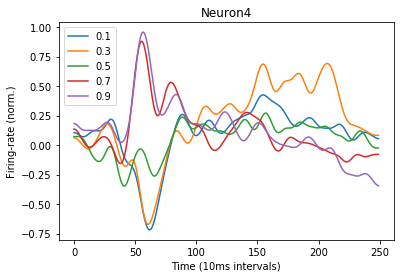

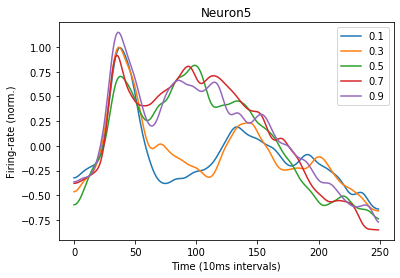

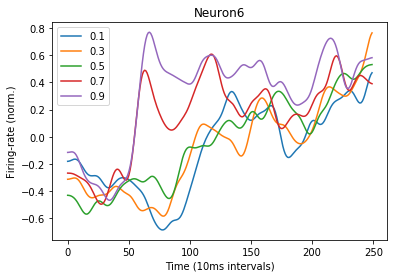

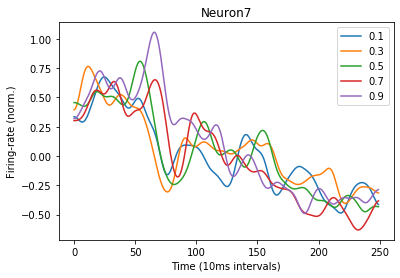

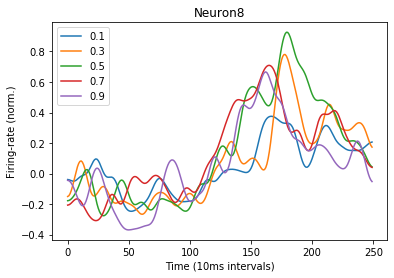

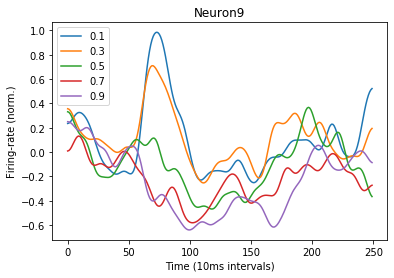

In [273]:

#_____start with one neuron

#y_data[0][0] #The First Neuron's fire-rate, on Trial 1, over 250 time points 
#x_data[0] # first neuron, different cues on trials 

#_____sort y_data into trial-groups using the x_data to index what data trials should be incorporated in what group 

NeuronIndexList = [0,1,2,3,4,5,6,7,8,9]
    
def AvgFireRate(NeuronIndex):    
   
    index_1 = np.where(x_data[NeuronIndex]==0.1)
    index_3 = np.where(x_data[NeuronIndex]==0.3)
    index_5 = np.where(x_data[NeuronIndex]==0.5)
    index_7 = np.where(x_data[NeuronIndex]==0.7)
    index_9 = np.where(x_data[NeuronIndex]==0.9)
    
    #OBS! groups are named by cue number, just as their index variable
    Data_group1 = y_data[NeuronIndex][index_1]
    Data_group3 = y_data[NeuronIndex][index_3]
    Data_group5 = y_data[NeuronIndex][index_5]
    Data_group7 = y_data[NeuronIndex][index_7]
    Data_group9 = y_data[NeuronIndex][index_9]
    
    #_____avarage the fire-rate over time, across trials (on all data with the same cue and neuron), generating 5 groups of averaged data (still only for one neuron).
    
    Group1_mean = np.mean(Data_group1, axis = 0)
    Group3_mean = np.mean(Data_group3, axis = 0)
    Group5_mean = np.mean(Data_group5, axis = 0)
    Group7_mean = np.mean(Data_group7, axis = 0)
    Group9_mean = np.mean(Data_group9, axis = 0)
    
    #_____ Plot the data in one chart 
    
    plot_name = plt.figure(NeuronIndex)
    plt.title("Neuron" + str(NeuronIndex))
    plt.plot(Group1_mean)
    plt.plot(Group3_mean)
    plt.plot(Group5_mean)
    plt.plot(Group7_mean)
    plt.plot(Group9_mean)
    plt.xlabel('Time (10ms intervals)')
    plt.ylabel('Firing-rate (norm.)')
    plt.legend(["0.1","0.3","0.5","0.7","0.9"])
    plot_name.show
    return
    #_____now create a for loop to perform the previous steps on each neuron and plot the data, generating 10 plots, one for each neuron, containing the averaged firing-rate over time for each cue.
        
for neuron in NeuronIndexList:
    AvgFireRate(neuron)
    plt.savefig('AvgFireRate of Neuron'+ str(neuron)+'.png')
      

## Question 2
#### Do all neurons have higher firing rates for higher value cues (like in the plot above), or do some do the opposite?

No, all neurons do not have higher firing rates for higher value cues, e.g., Neuron9 above have higher firing rates
for lower cues. This could mean it codes information related to low value. Interestingly, Neuron4 and Neuron6 seem
to respond with higher firing rates during high value (0.7 and 0.9) and low firing rates during low value 
(0.1 and 0.3). This suggest these neurons code information related both to higher and lower value. Neuron0 also seem to process both high and low value but respond with high firing rates to low value and low firing rates
to high value. Neuron5 shows a firing rate to all cues and directly at the stimuli presentation (400 ms) suggesting that it might not code for value directly but rather code for the stimuli information being processed.


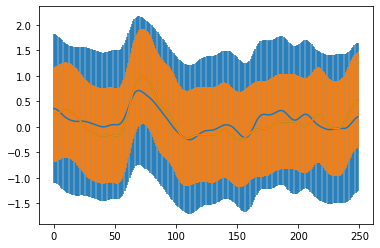

In [274]:
#__________... ADD STANDARD ERROR FOR EACH CUE________
        
#___find standard error for each cue, that is, the standard deviation of each cue 

SD_Data_group1 = np.std(Data_group1[0], ddof = 1)
SD_Data_group3 = np.std(Data_group3[0], ddof = 1)
SD_Data_group5 = np.std(Data_group5[0], ddof = 1)
SD_Data_group7 = np.std(Data_group7[0], ddof = 1)
SD_Data_group9 = np.std(Data_group9[0], ddof = 1)

#___add this to plot by plt.errorbar
x = np.arange(0,250)
y1 = Group1_mean
y3 = Group3_mean
e1 = SD_Data_group1
e3 = SD_Data_group3

plt.errorbar(x,y3,e3)
plt.errorbar(x,y1,e1)
plt.plot(Group1_mean)

#___add errorbar to each plot 



# OBS!!!! I see now that the standard deviation is mysteriously high and I realise I must have calculated it wrong.
# My 2h time for this task is sadly over but I will read up on numpy.std in more detail and, 
# after sending my current progress to you, I will finish this task and continue playing 
# with this data as it is a lot of fun!
